
Actividad 6: Redes neuronales.

Nombre: Angel Arturo Ramirez Molano

Matricula: 2109472

Hora clase: N1

In [ ]:
#Cargar librerias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [ ]:
#Cargar datos
keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
#assert train_images.shape == (60000, 28, 28)
#assert test_images.shape == (10000, 28, 28)
#assert train_labels.shape == (60000,)
#assert test_labels.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


Preprocesamiento de los datos

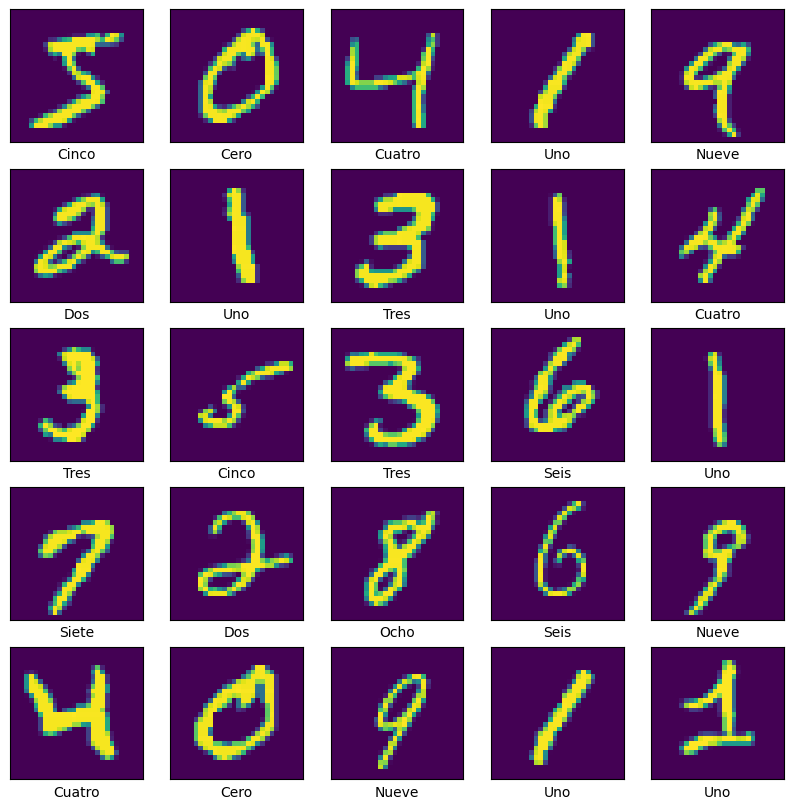

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete','Ocho', 'Nueve']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Seleccion y entrenamiento

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (3, 3), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 56)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 53s 27ms/step - loss: 0.2721 - accuracy: 0.9261 - val_loss: 0.0633 - val_accuracy: 0.9799
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0447 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0320 - accuracy: 0.9902 - val_loss: 0.0335 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0364 - val_accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0302 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0433 - val_accura

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.0366 - accuracy: 0.9901 - 3s/epoch - 11ms/step

Test accuracy: 0.9901000261306763


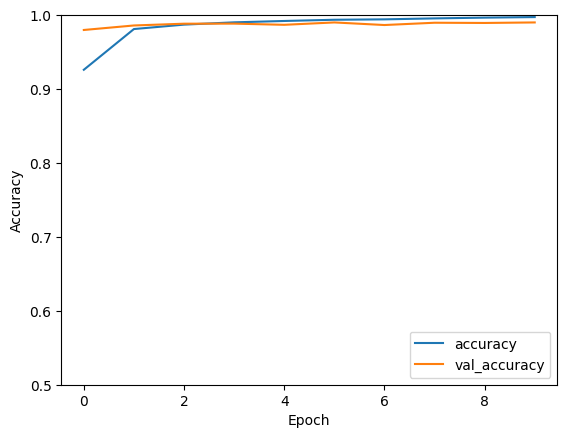

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 7ms/step


Prueba del modelo

In [ ]:
# Prediccion 1
predictions[0]

array([3.8180882e-11, 8.3970875e-08, 4.4199354e-08, 2.0067023e-07,
       1.9091553e-08, 1.1954948e-10, 8.2740119e-13, 9.9999934e-01,
       2.6656812e-09, 9.0026973e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
predictions[5]

array([8.5960266e-08, 9.9998075e-01, 6.9160656e-08, 1.6071159e-08,
       2.5005345e-06, 2.0092973e-06, 5.6155113e-07, 9.8971932e-06,
       3.8811936e-06, 2.1421140e-07], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
#prediccion 2
predictions[42]

array([2.1870146e-11, 4.5218108e-08, 7.0846842e-11, 9.8100854e-11,
       9.9999601e-01, 5.9917518e-08, 1.6942835e-07, 2.8999682e-06,
       6.0757424e-07, 1.6757922e-07], dtype=float32)

In [ ]:
np.argmax(predictions[42])

4

In [ ]:
test_labels[42]

4

In [ ]:
#prediccion 3
predictions[26]

array([1.03464481e-08, 1.65883577e-07, 8.75752505e-07, 7.22574839e-07,
       1.05445785e-08, 7.55048823e-09, 4.00933930e-12, 9.99991238e-01,
       1.98030516e-08, 6.94306846e-06], dtype=float32)

In [ ]:
np.argmax(predictions[26])

7

In [ ]:
test_labels[26]

7

In [ ]:
#prediccion 4
predictions[14]

array([1.1866443e-07, 9.9998564e-01, 6.7993369e-08, 1.1980934e-08,
       4.6075547e-06, 1.0054150e-06, 6.5052213e-06, 8.5506292e-07,
       9.4352862e-07, 2.5530494e-07], dtype=float32)

In [ ]:
np.argmax(predictions[14])

1

In [ ]:
test_labels[14]

1

In [ ]:
#prediccion 5
predictions[66]

array([5.6135254e-06, 6.7316833e-08, 1.3546281e-12, 1.5734100e-10,
       4.5044299e-08, 1.1906885e-05, 9.9998230e-01, 5.1408851e-12,
       1.5703154e-07, 6.3246575e-10], dtype=float32)

In [ ]:
np.argmax(predictions[66])

6

In [ ]:
test_labels[66]

6

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

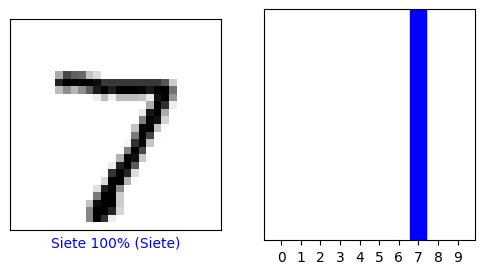

In [ ]:
#Grafica de la prediccion 1
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

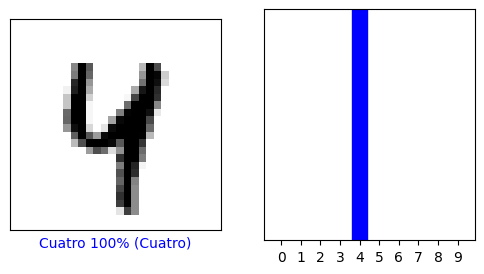

In [ ]:
#Grafica de la prediccion 2
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

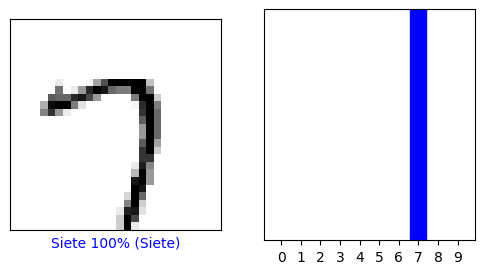

In [ ]:
#Grafica de la prediccion 3
i = 26
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

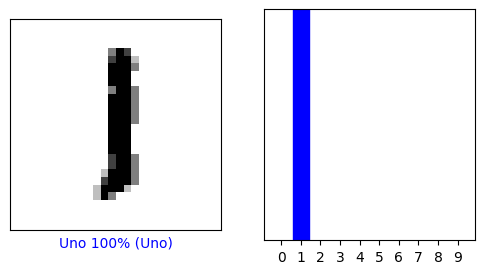

In [ ]:
#Grafica de la prediccion 4
i = 14
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

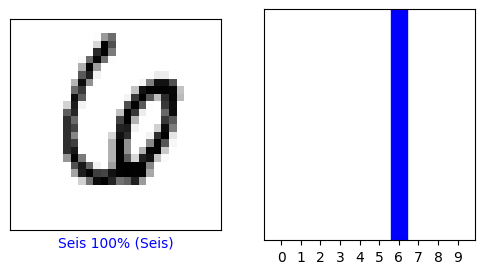

In [ ]:
#Grafica de la prediccion 5
i = 66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

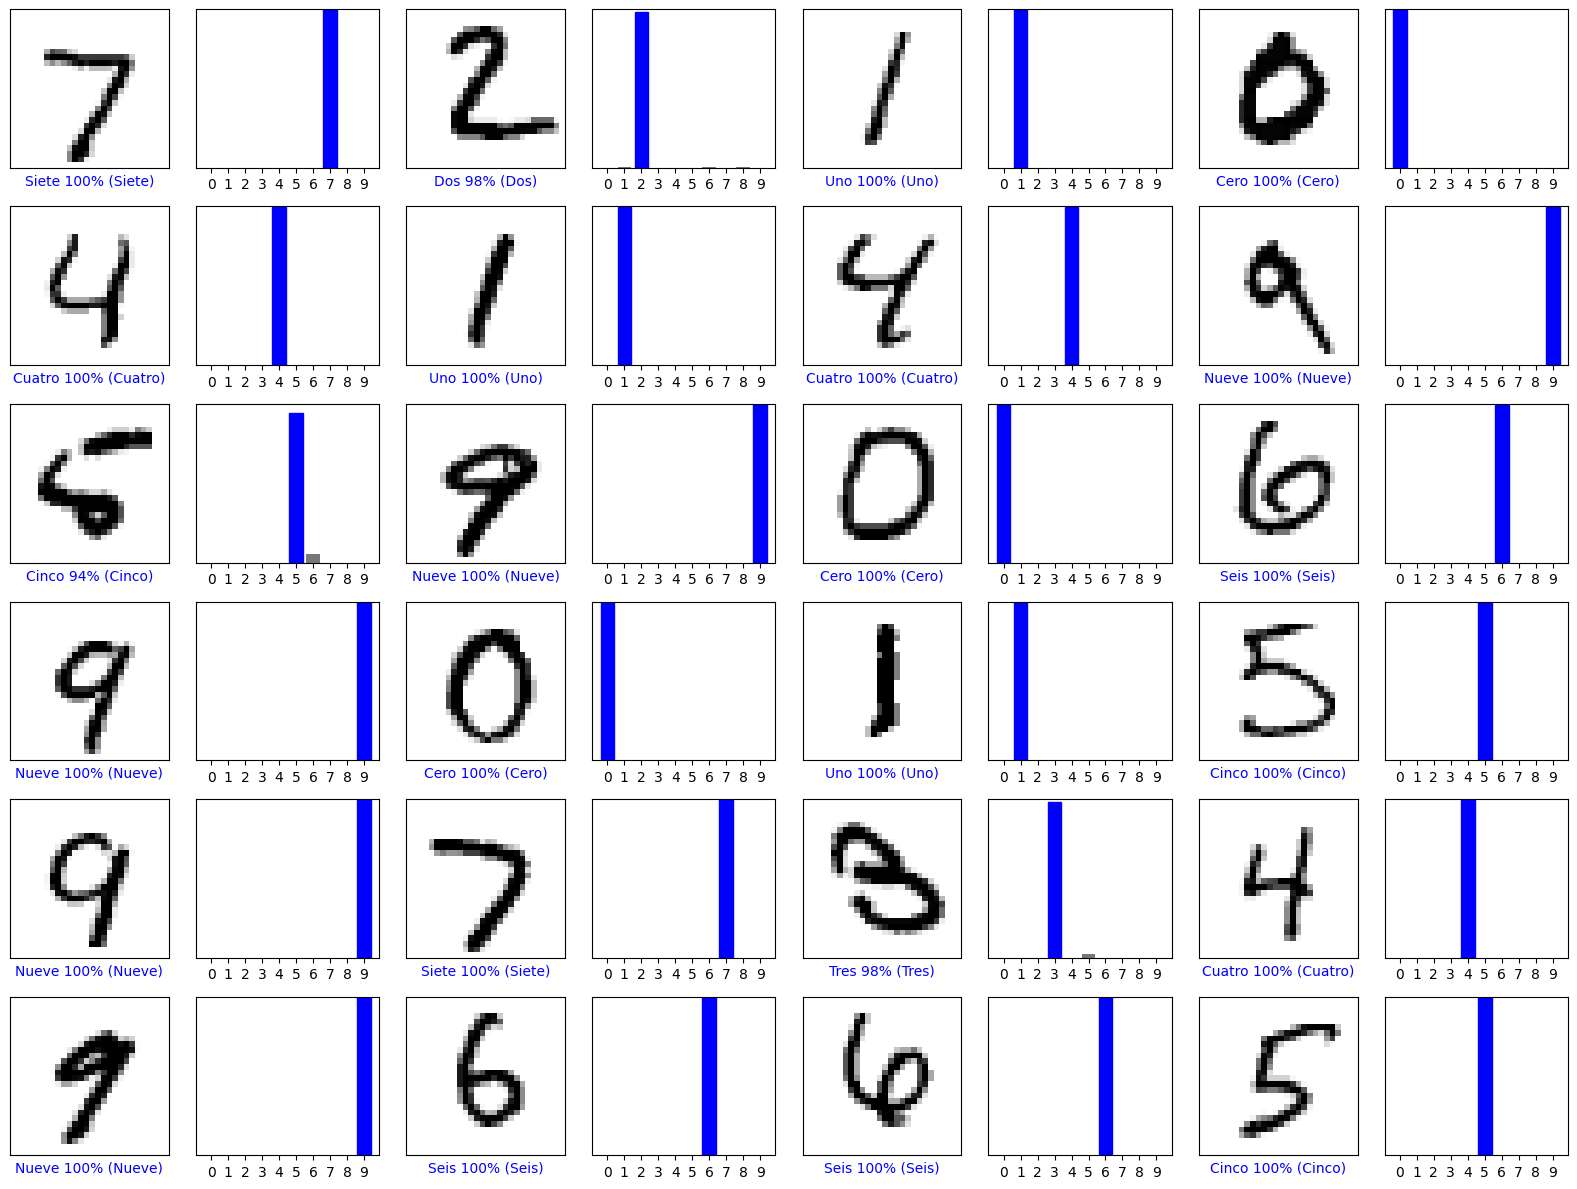

In [ ]:
#Graficar multiples imagenes
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#Modelo entrenado para una sola imagen
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.0954228e-03 6.0421340e-03 9.8198134e-01 7.8170706e-05 2.5706888e-07
  2.5391662e-06 7.3577869e-03 2.1142218e-07 3.4421345e-03 4.4934048e-08]]


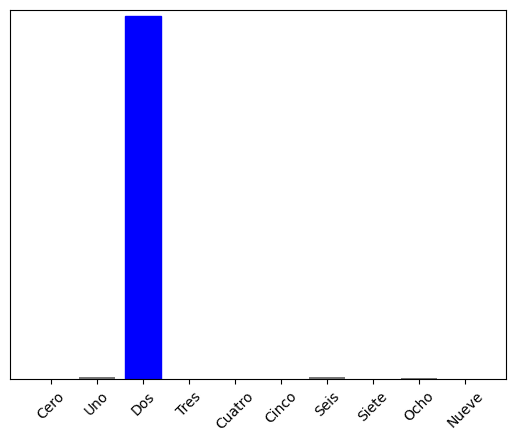

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

R= Use las mismas, 10.

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

R=  Considero que en los dos los resultados fueron similares, aunque considero este mejor